# Feature Engineering and Modelling

---

1. Import packages
2. Load data
3. Feature engineering
4. Modelling & Performance Evaluation
5. Feature importance
6. Conclusion & Future work

---

## 1. Import packages

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

---
## 2. Load data

In [3]:
# Load the data from previous EDA task 
df = pd.read_csv('./client_price_data.csv')

# Transform all the date columns to pandas datetime format
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')



In [4]:
df.head(3)

,Unnamed: 0,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,...,origin_up,pow_max,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,off_peak_peak_var_mean_diff,peak_mid_peak_var_mean_diff,off_peak_mid_peak_var_mean_diff,peak_mid_peak_fix_mean_diff,peak_mid_peak_var_max_monthly_diff
0,0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,0.020057,3.700961,0.024038,0.034219,0.058257,7.45067,0.085483
1,1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,...,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0,-0.003767,0.177779,0.142485,0.007124,0.149609,0.00000,0.085483
2,2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,...,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0,-0.004670,0.177779,0.082090,0.088421,0.170512,0.00000,0.089162


In [5]:
# Drop the unnecessary column loaded from csv
df = df.drop(columns='Unnamed: 0')

In [6]:
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,origin_up,pow_max,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,off_peak_peak_var_mean_diff,peak_mid_peak_var_mean_diff,off_peak_mid_peak_var_mean_diff,peak_mid_peak_fix_mean_diff,peak_mid_peak_var_max_monthly_diff
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,0.020057,3.700961,0.024038,0.034219,0.058257,7.450670,0.085483
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0,-0.003767,0.177779,0.142485,0.007124,0.149609,0.000000,0.085483
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0,-0.004670,0.177779,0.082090,0.088421,0.170512,0.000000,0.089162
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0,-0.004547,0.177779,0.151210,0.000000,0.151210,0.000000,0.000000
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0,-0.006192,0.162916,0.020536,0.030773,0.051309,8.137629,0.033743


---

## 3. Feature engineering

As we have seen in the EDA, the price features has really low correlation with churn, and many features are highly correlated, so the loaded data are combined with price feature but removed the highly-correlated features.
Now it's time to create new features.

###  Tenure

How long a company has been a client of PowerCo.

Although we have one variable called num_years_antig, we found it's not absolute accurate, so we will re-process the data to get the accurate tenure of each client.

In [7]:
df['tenure'] =((df['date_end'] - df['date_activ']) / np.timedelta64(1, 'Y')).astype(int)

In [8]:
df.groupby('tenure').agg({'id': 'count', 'churn':'mean'}).sort_values(by = 'churn', ascending = False)

,id,churn
tenure,,
3,1169,0.143713
2,263,0.133080
4,3801,0.125756
13,42,0.095238
5,3067,0.085425
12,132,0.083333
6,3085,0.080713
7,2616,0.073394
11,173,0.063584


As we can see, clients who have been with this company for less than 4 years are more likely to churn compared to clients who have longer tenure. Interestingly, the difference between 4 and 5 months is about 4%, which represents a large jump in likelihood for a customer to churn compared to the other differences between ordered tenure values. Perhaps this reveals that getting a customer to over 4 months tenure is actually a large milestone with respect to keeping them as a long term customer.

This is an interesting feature to keep for modelling because clearly how long you've been a client, has a influence on the chance of a client churning.

### Transforming dates into months

Dates as a datetime object are not useful for a predictive model, so transforming dates into months which become a interval variable which may hold more predictive power.

Here I transformed three dates to month until the reference date - Jan 2016, which is the end date of this dataset.

- months_activ = Number of months active until reference date (Jan 2016)
As we have seen earlier, the longer a client has been with this company, the less likely they will churn. Hence, we add month_activ feature.

- months_to_end = Number of months of the contract left until reference date (Jan 2016)
When the client's contract has coming to the end, client need to make a choice of stay or switch supplier, so it is interesting to keep this feature as it may reveal patterns and behaviours about timing of churn.

- months_modif_prod = Number of months since last modification until reference date (Jan 2016)
When the client has recently modify their product package, it may mean they are engaged clients which like upgrading or try different product of this company. 



I did not use date_renewal to create new feature because the date_renewal is just the last renewal date which is just the same date of their active date but in year 2015. We cannot gain much useful information from this vairable.

In [9]:
# Create a function to convert the date into month
def convert_month(reference_date, df, cols):
   
    month = ((pd.to_datetime(reference_date) - df[cols]) / np.timedelta64(1, 'M')).astype(int)
    return month   
     


In [10]:
# Create reference date
reference_date = datetime(2016, 1, 1)

df['months_activ'] = convert_month(reference_date, df, 'date_activ')
df['months_to_end'] =  -convert_month(reference_date, df, 'date_end')
df['months_modif_prod'] = convert_month(reference_date, df, 'date_modif_prod')

In [11]:
print(df.loc[:, ['months_activ', 'months_to_end', 'months_modif_prod']])

       months_activ  months_to_end  months_modif_prod
0                30              5                  2
1                76              7                 76
2                68              3                 68
3                69              2                 69
4                71              2                 71
...             ...            ...                ...
14601            43              4                  7
14602            40              7                 40
14603            46              1                 46
14604            40              7                 40
14605            72             11                 72

[14606 rows x 3 columns]


In [12]:
# We no longer need the datetime columns that we used for feature engineering, so we can drop them
remove = [
    'date_activ',
    'date_end',
    'date_modif_prod',
    'date_renewal'
]

df = df.drop(columns=remove)
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,...,offpeak_diff_dec_january_power,off_peak_peak_var_mean_diff,peak_mid_peak_var_mean_diff,off_peak_mid_peak_var_mean_diff,peak_mid_peak_fix_mean_diff,peak_mid_peak_var_max_monthly_diff,tenure,months_activ,months_to_end,months_modif_prod
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.00,0,0.0,1.78,0.114481,...,3.700961,0.024038,0.034219,0.058257,7.450670,0.085483,3,30,5,2
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,189.95,0,0.0,16.27,0.145711,...,0.177779,0.142485,0.007124,0.149609,0.000000,0.085483,7,76,7,76
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,47.96,0,0.0,38.72,0.165794,...,0.177779,0.082090,0.088421,0.170512,0.000000,0.089162,6,68,3,68
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,240.04,0,0.0,19.83,0.146694,...,0.177779,0.151210,0.000000,0.151210,0.000000,0.000000,6,69,2,69
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,445.75,526,0.0,131.73,0.116900,...,0.162916,0.020536,0.030773,0.051309,8.137629,0.033743,6,71,2,71


### Transforming Boolean data

#### has_gas

Transform this column from categorical data to binary data (0,1)
Seems like clients who uses gas from PowerCo are less likely to churn compared to others who does not use gas.

In [13]:
df['has_gas'] = df['has_gas'].replace(['t','f'], [1, 0])
df.groupby('has_gas')['churn'].mean()

has_gas
0    0.100544
1    0.081856
Name: churn, dtype: float64

### Transforming categorical data

Another important step before building the predictive model is to transform categorical data into dummy variables (One hot encoding), which will create a new feature for every unique category and fill this column with 1 or 0 to indicate the client does or does not belong to this category.

#### channel_sales

In [14]:
# Transform into categorical type
df['channel_sales'] = df['channel_sales'].astype('category')

# Let's see how many categories are within this column
df['channel_sales'].value_counts()

foosdfpfkusacimwkcsosbicdxkicaua    6754
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: channel_sales, dtype: int64

In [15]:
categories_channel = pd.get_dummies(df['channel_sales'], prefix = 'channel')
categories_channel.columns = [col[:12] for col in categories_channel.columns]
# Merge it back to the dataframe
df = df.join(categories_channel)

The last 3 categories in the output above, show that they only have 11, 3 and 2 occurrences respectively. Considering that our dataset has about 14000 rows, this means that these dummy variables will be almost entirely 0 and so will not add much predictive power to the model at all.
For this reason, these 3 dummy variables are dropped.

In [16]:
df = df.drop(columns=['channel_sddi', 'channel_epum', 'channel_fixd', 'channel_sales'])

#### origin_up

In [17]:
# Transform into categorical type
df['origin_up'] = df['origin_up'].astype('category')

# Let's see how many categories are within this column
df['origin_up'].value_counts()

lxidpiddsbxsbosboudacockeimpuepw    7097
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: origin_up, dtype: int64

In [18]:
categories_origin = pd.get_dummies(df['origin_up'], prefix = 'origin')
categories_origin.columns = [col[:10] for col in categories_origin.columns]

In [19]:
df = df.join(categories_origin)

In [20]:
df.columns

Index(['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn',
       'offpeak_diff_dec_january_energy', 'offpeak_diff_dec_january_power',
       'off_peak_peak_var_mean_diff', 'peak_mid_peak_var_mean_diff',
       'off_peak_mid_peak_var_mean_diff', 'peak_mid_peak_fix_mean_diff',
       'peak_mid_peak_var_max_monthly_diff', 'tenure', 'months_activ',
       'months_to_end', 'months_modif_prod', 'channel_MISS', 'channel_ewpa',
       'channel_foos', 'channel_lmke', 'channel_usil', 'origin_MIS',
       'origin_ewx', 'origin_kam', 'origin_ldk', 'origin_lxi', 'origin_usa'],
      dtype='object')

For same reason, we drop three least value count dummy varibles in origin_up

In [21]:
df = df.drop(columns=['origin_MIS', 'origin_usa', 'origin_ewx', 'origin_up'])

In [22]:
df

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,months_to_end,months_modif_prod,channel_MISS,channel_ewpa,channel_foos,channel_lmke,channel_usil,origin_kam,origin_ldk,origin_lxi
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,...,5,2,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,...,7,76,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,...,3,68,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,...,2,69,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,445.75,526,0.0,131.73,0.116900,0.100015,...,2,71,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,32270,47940,0,4648.01,0,0.0,18.57,0.138305,0.000000,...,4,7,0,0,1,0,0,0,0,1
14602,d0a6f71671571ed83b2645d23af6de00,7223,0,181,631.69,181,0.0,144.03,0.100167,0.091892,...,7,40,0,0,1,0,0,0,0,1
14603,10e6828ddd62cbcf687cb74928c4c2d2,1844,0,179,190.39,179,0.0,129.60,0.116900,0.100015,...,1,46,0,0,1,0,0,0,0,1
14604,1cf20fd6206d7678d5bcafd28c53b4db,131,0,0,19.34,0,0.0,7.18,0.145711,0.000000,...,7,40,0,0,1,0,0,0,0,1


### Transforming numerical data

In EDA we have seen the consumption and forecast variables are highly positive skewed, before building the predictive models, we need to try transform those data to see if they are independent and normally distributed. As the models have parametric assumptions. 

For this use case we will use the 'Logarithm' transformation for the positively skewed features. 

Because we cannot apply log to a value of 0, so we will add a constant of 1 to all the values

First I want to see the statistics of the skewed features, so that we can compare before and after transformation

In [23]:
skewed = [
    'cons_12m', 
    'cons_gas_12m', 
    'cons_last_month',
    'forecast_cons_12m', 
    'forecast_cons_year', 
    'forecast_discount_energy',
    'forecast_meter_rent_12m', 
    'forecast_price_energy_off_peak',
    'forecast_price_energy_peak', 
    'forecast_price_pow_off_peak'
]

df[skewed].describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378


We can see that the standard deviation for most of these features is quite high.

In [24]:
# Apply log10 transformation
df["cons_12m"] = np.log10(df["cons_12m"] + 1)
df["cons_gas_12m"] = np.log10(df["cons_gas_12m"] + 1)
df["cons_last_month"] = np.log10(df["cons_last_month"] + 1)
df["forecast_cons_12m"] = np.log10(df["forecast_cons_12m"] + 1)
df["forecast_cons_year"] = np.log10(df["forecast_cons_year"] + 1)
df["forecast_meter_rent_12m"] = np.log10(df["forecast_meter_rent_12m"] + 1)
df["imp_cons"] = np.log10(df["imp_cons"] + 1)

In [25]:
df[skewed].describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak
count,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,4.223939,0.779244,2.264646,2.962177,1.784610,0.966726,1.517203,0.137283,0.050491,43.130056
std,0.884515,1.717071,1.769305,0.683592,1.584986,5.108289,0.571481,0.024623,0.049037,4.485988
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.754023,0.000000,0.000000,2.695477,0.000000,0.000000,1.235023,0.116340,0.000000,40.606701
50%,4.149727,0.000000,2.899547,3.046836,2.498311,0.000000,1.296555,0.143166,0.084138,44.311378
75%,4.610285,0.000000,3.529430,3.380716,3.242231,0.000000,2.120673,0.146348,0.098837,44.311378
max,6.792889,6.618528,5.887169,4.918575,5.243970,30.000000,2.778376,0.273963,0.195975,59.266378


We can see after transform the standard deviation is much smaller.
Let's plot the histogram 

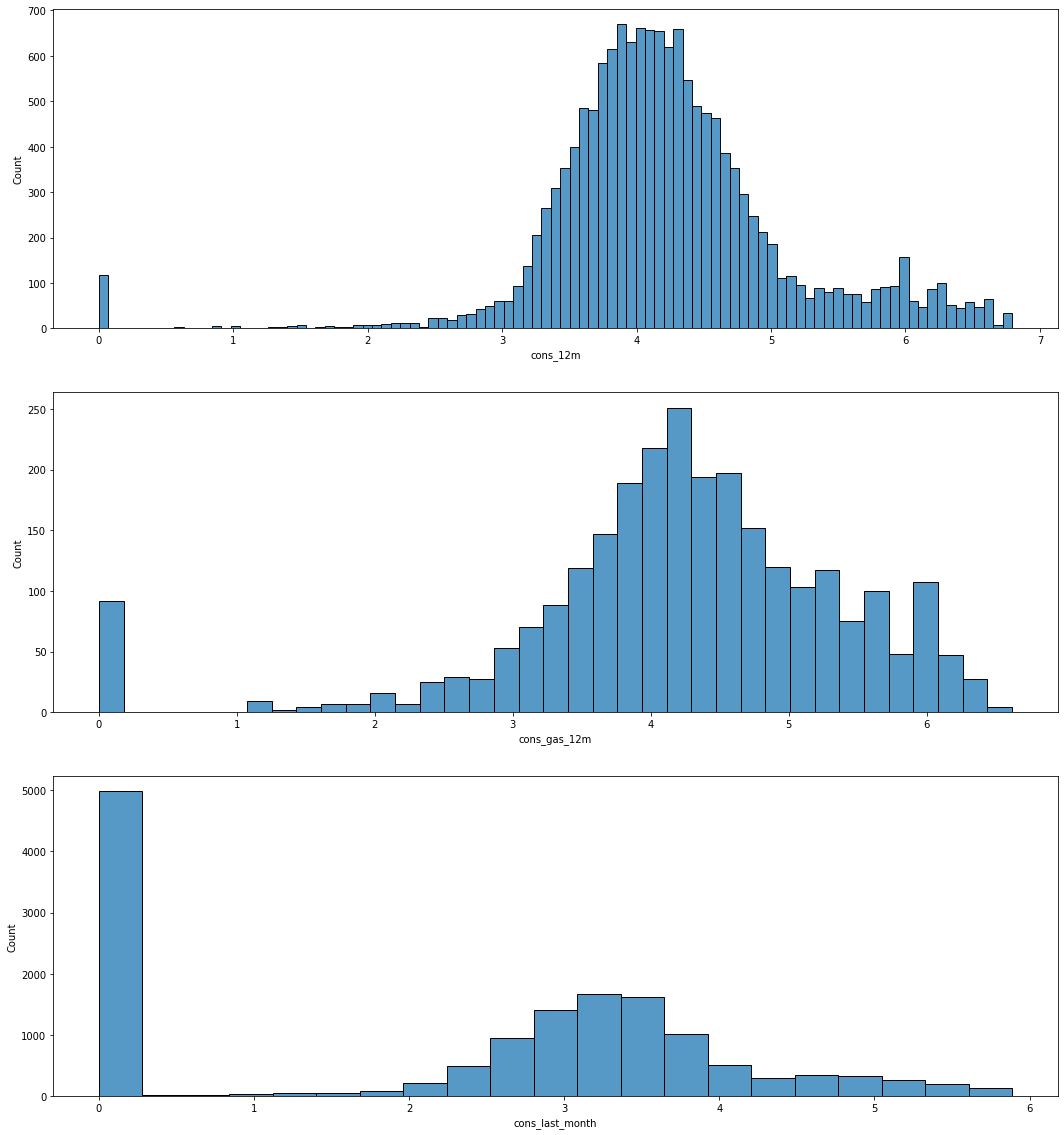

In [26]:
fig, axs = plt.subplots(nrows=3, figsize=(18, 20))
# Plot histograms
sns.histplot((df["cons_12m"].dropna()), ax=axs[0])
sns.histplot((df[df["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1])
sns.histplot((df["cons_last_month"].dropna()), ax=axs[2])
plt.show()

Histogram shows it normal distribution

### Correlations

The similar correlation analysis performed in EDA is performed here as I want to see how the new features correlated for the same reason: For features to be independent, this means that each feature must have absolutely no dependence on any other feature. If two features are highly correlated and share similar information, this breaks this assumption. 


In [27]:
correlation = df.corr()
correlation.head()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,months_to_end,months_modif_prod,channel_MISS,channel_ewpa,channel_foos,channel_lmke,channel_usil,origin_kam,origin_ldk,origin_lxi
cons_12m,1.000000,0.209637,0.623493,0.557186,0.321928,-0.028437,0.201488,-0.144678,0.277831,-0.162694,...,-0.094377,0.074155,-0.084505,-0.064549,-0.021040,0.300029,-0.125876,0.032191,-0.026175,-0.006561
cons_gas_12m,0.209637,1.000000,0.171077,0.108450,0.084575,0.001444,0.063462,-0.041916,0.075684,-0.030439,...,0.009399,0.019233,0.030565,-0.008177,-0.046458,0.048664,-0.014001,0.000443,0.001582,-0.002899
cons_last_month,0.623493,0.171077,1.000000,0.292725,0.786051,-0.015106,0.326362,-0.236935,0.396657,-0.162611,...,-0.087789,0.065223,-0.058077,-0.066062,0.010777,0.205685,-0.111115,-0.031805,-0.023550,0.049516
forecast_cons_12m,0.557186,0.108450,0.292725,1.000000,0.361325,0.056053,0.222187,0.047935,0.220189,0.101439,...,-0.090652,-0.104551,-0.099932,-0.006704,0.055963,0.081416,-0.034369,-0.031513,-0.020166,0.046185
forecast_cons_year,0.321928,0.084575,0.786051,0.361325,1.000000,0.014451,0.391082,-0.296602,0.431537,-0.194797,...,-0.058543,-0.009869,-0.035257,-0.034238,0.057864,0.038128,-0.062021,-0.097037,-0.012083,0.099111


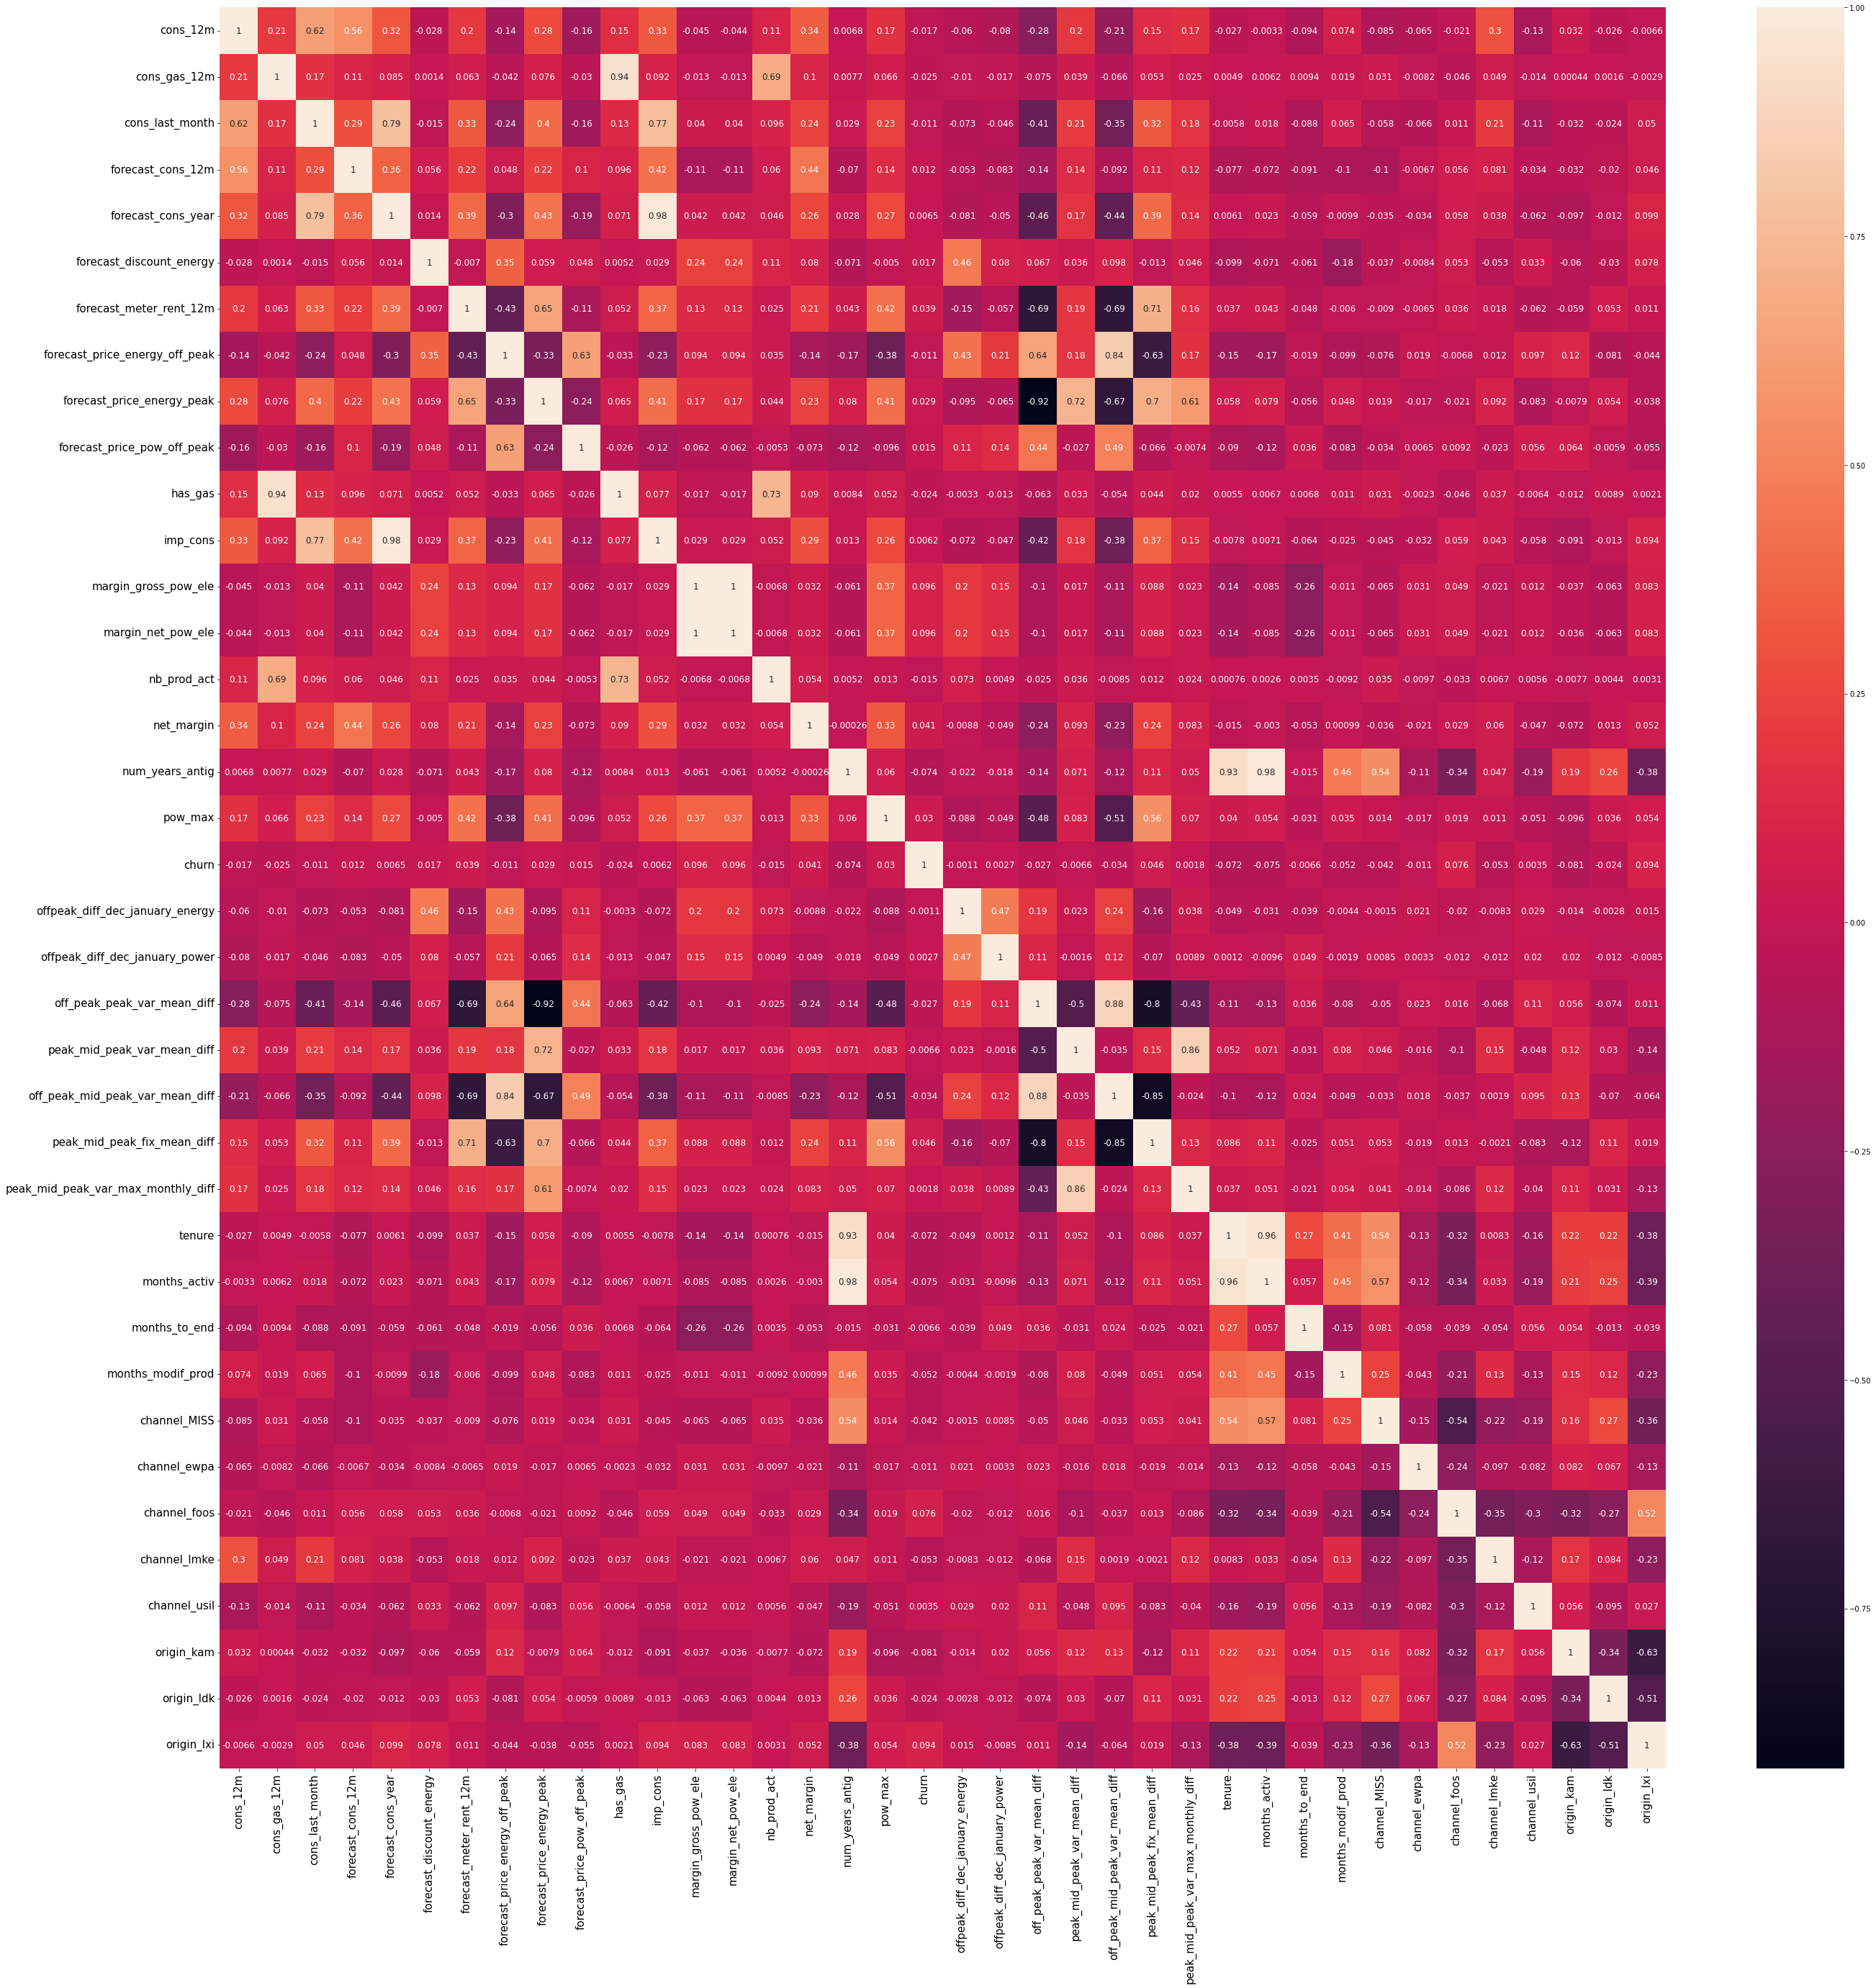

In [28]:
# Plot correlation
plt.figure(figsize=(45, 45))
sns.heatmap(
    correlation, 
    xticklabels=correlation.columns.values,
    yticklabels=correlation.columns.values, 
    annot=True, 
    annot_kws={'size': 12}
)
# Axis ticks size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

### Selecting features based on correlation
Dropped variables which exhibit a high correlation (>0.9) with other independent features.

In [29]:
# Get the absolute value of correlation
corr_abs = correlation.abs()

# Select upper triangle of correlation matrix
upper = corr_abs.where(np.triu(np.ones(corr_abs.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.9
cor_features = [column for column in upper.columns if any(upper[column] > 0.9)]

print(cor_features)

['has_gas', 'imp_cons', 'margin_net_pow_ele', 'off_peak_peak_var_mean_diff', 'tenure', 'months_activ']


In [30]:
# Drop above 5 high correlation features

df = df.drop(columns=cor_features)
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,months_to_end,months_modif_prod,channel_MISS,channel_ewpa,channel_foos,channel_lmke,channel_usil,origin_kam,origin_ldk,origin_lxi
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,...,5,2,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.000000,0.0,1.237292,0.145711,0.000000,...,7,76,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.000000,0.0,1.599009,0.165794,0.087899,...,3,68,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.000000,0.0,1.318689,0.146694,0.000000,...,2,69,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,2.721811,0.0,2.122969,0.116900,0.100015,...,2,71,1,0,0,0,0,1,0,0


---

## 4. Modelling & Performance Evaluation


In [31]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier
from xgboost import XGBClassifier
import sklearn.metrics as metrics
from datetime import datetime

### Stratified Random Sampling

Considering the data is a quite imbalanced dataset (positive/negative ratio =0.11), I will try different models and evaluate its performance. 
To start with,  split the data into training and testing data set(75%:25%), use stratify method as the dataset is imbalanced.

In [32]:
# Make a copy of our data
train_df = df.copy()

# Separate target variable from independent variables
y = df['churn']
X = df.drop(columns=['id', 'churn'])
print(X.shape)
print(y.shape)


(14606, 31)
(14606,)


In [33]:
print(y.value_counts())

0    13187
1     1419
Name: churn, dtype: int64


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10954, 31)
(10954,)
(3652, 31)
(3652,)


### Grid Search Cross Validation

Use grid search cross validation to select the best hyperparameters for models.
F1 was chosen as the score to find the best model, as we are interested in the customer who will churn and potentially can target them to do some marketing.


In [35]:
best_classifiers=[]

def GridSearchCV_model(model_name, model, params, X_train, y_train, y_test, cv=3):
    
    print("=====================", model_name, "=====================\n")
    # Instatntiate gridsearch

    grid = GridSearchCV(estimator=model, param_grid=params, cv=cv, scoring='recall', verbose=1, n_jobs=-1)

    # Fit the model to the training set

    grid.fit(X_train, y_train)

    # Extract the best hyperparameters

    best_hyperparams=grid.best_params_
    print('Best hyperparameters:\n', best_hyperparams)

    # Extract the best model 

    best_model=grid.best_estimator_
    y_predict = best_model.predict(X_test)

    # Evaluate the best model performance

    print(metrics.classification_report(y_test, y_predict))
    
    # Plot Best model's ROC AUC
    probs = best_model.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    
    plt.title('ROC AUC')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    # Append the best model to the list
    best_classifiers.append(best_model)

### Model fitting and parameter tuning

4 Models are trained and to compare their performance:
1. Random Forest with balanced class weight
2. Balanced Random Forest
3. Easy Ensemble Classifier
4. Weighted Extreme Gradient Boost

===================== Random Forest with balanced class weight =====================

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best hyperparameters:
 {'class_weight': 'balanced', 'max_depth': 10, 'n_estimators': 500}
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      3297
           1       0.24      0.30      0.27       355

    accuracy                           0.84      3652
   macro avg       0.58      0.60      0.59      3652
weighted avg       0.86      0.84      0.85      3652



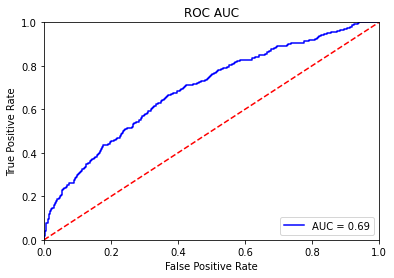

===================== Balanced Random Forest =====================

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best hyperparameters:
 {'max_depth': 20, 'n_estimators': 300, 'oob_score': True}
              precision    recall  f1-score   support

           0       0.95      0.65      0.77      3297
           1       0.17      0.67      0.27       355

    accuracy                           0.65      3652
   macro avg       0.56      0.66      0.52      3652
weighted avg       0.87      0.65      0.73      3652



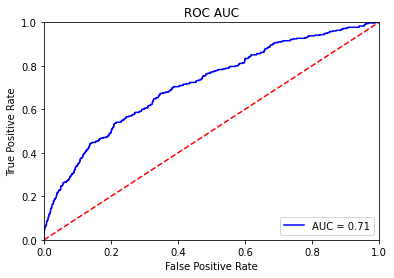

===================== Easy Ensemble Classifier =====================

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best hyperparameters:
 {'n_estimators': 100, 'sampling_strategy': 0.3}
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      3297
           1       0.31      0.07      0.12       355

    accuracy                           0.89      3652
   macro avg       0.61      0.53      0.53      3652
weighted avg       0.85      0.89      0.86      3652



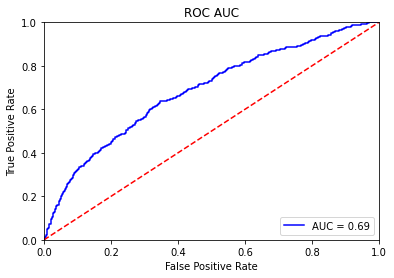

===================== Extreme Gradient Boost with balanced class weight =====================

Fitting 3 folds for each of 12 candidates, totalling 36 fits


/usr/local/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/usr/local/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/usr/local/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/usr/local/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from panda

/usr/local/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/usr/local/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/usr/local/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/usr/local/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pa

Best hyperparameters:
 {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 500, 'scale_pos_weight': 9}
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      3297
           1       0.55      0.23      0.33       355

    accuracy                           0.91      3652
   macro avg       0.74      0.61      0.64      3652
weighted avg       0.89      0.91      0.89      3652



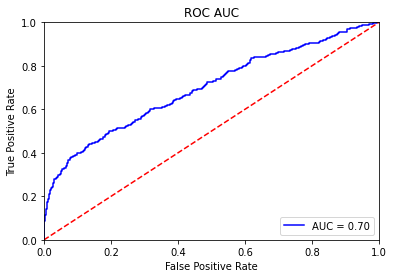

In [43]:
seed = 42
classifier_names=['Random Forest with balanced class weight', 'Balanced Random Forest', 'Easy Ensemble Classifier', 'Extreme Gradient Boost with balanced class weight']

classifiers = [RandomForestClassifier(random_state=seed), 
               BalancedRandomForestClassifier(random_state=seed), 
               EasyEnsembleClassifier(random_state=seed),
               XGBClassifier(random_state=seed, use_label_encoder=False, verbosity = 0)]

params_grids = [{'n_estimators':[500, 700], 
                 'class_weight':['balanced'],
                 'max_depth':[10, 15, 20]},
                {'n_estimators':[300, 500],
                 'oob_score':[True, False],
                 'max_depth':[10, 15, 20]},
                {'n_estimators':[10, 50, 100],
                 'sampling_strategy':[0.2, 0.3]},
                {'scale_pos_weight':[9,11],
                 'learning_rate':[0.1],
                 'max_depth':[10,15,20],
                 'n_estimators':[300, 500]}]

for model_name, model, params in zip(classifier_names, classifiers, params_grids):
    GridSearchCV_model(model_name, model, params, X_train, y_train, y_test)

### Model Comparison & Performance Evaluation


To evaluate how well this trained model is able to predict the values of the test dataset.

We are going to use 4 metrics to evaluate performance:

- Accuracy = the ratio of correctly predicted observations to the total observations
- Precision = the ability of the classifier to not label a negative sample as positive
- Recall = the ability of the classifier to find all the positive samples
- F1 Score = to compare the performance of two classifiers
- ROC AUC Score = the measure of the ability of a classifier to distinguish between classes 

Summary all the model's performance, introducing training time as an additional evaluation metrics.


In [44]:
seconds ={}
accuracy_test={}
precision_test = {}
roc_test = {}
recall_test = {}
f1_test = {}

for model_name, model in zip(classifier_names, best_classifiers):
    start = datetime.now()
    model.fit(X_train, y_train)
    y_predictions= model.predict(X_test)
    end = datetime.now()
    
    seconds[model_name] = (end-start).total_seconds()
    accuracy_test[model_name]= metrics.accuracy_score(y_test, y_predictions).round(4)
    precision_test[model_name] = metrics.precision_score(y_test, y_predictions).round(4)
    recall_test[model_name] = metrics.recall_score(y_test, y_predictions).round(4)
    f1_test[model_name] = metrics.f1_score(y_test, y_predictions).round(4)
    roc_test[model_name] = metrics.roc_auc_score(y_test, y_predictions).round(4)
    
    scores = pd.DataFrame([accuracy_test, precision_test, recall_test, f1_test, roc_test, seconds], index= ["accuracy_test", "precision_test", "recall_test", "f1_test", "roc_test", "seconds"]).T


In [46]:
scores = scores.sort_values("recall_test", ascending = False)
scores

,accuracy_test,precision_test,recall_test,f1_test,roc_test,seconds
Balanced Random Forest,0.6550,0.1723,0.6704,0.2742,0.6619,2.995469
Random Forest with balanced class weight,0.8406,0.2415,0.2986,0.2670,0.5988,7.578052
Extreme Gradient Boost with balanced class weight,0.9069,0.5503,0.2310,0.3254,0.6053,14.973560
Easy Ensemble Classifier,0.8940,0.3095,0.0732,0.1185,0.5278,53.822979


### Final Model 

From the performance summary above, Extreme Gradient Boost with balanced class weight outperformed other models in accuracy, precision, and F1 score, however the recall rate is relatively low.
On the other hand, Balanced Random Forest has the highest recall rate (67.04%) and the fastest model training time (6s), while its precision rate is relatively low.
Since the target is to find the customer who may churn and targeting them for the follow up marketing action, the result of not finding out the customer who may churn is worse than predicting customer who may not churn as churn.

Hence, the recall rate are considered as the primary metrics and Balanced Random Forest model is chosen as the final model.

---
## 5. Feature importance

Visualise Balanced Random Forest model's feature importance for model interpertation. 

In [40]:
feature_importances_BRF = pd.DataFrame({
    'features': X_train.columns,
    'importance': best_classifiers[1].feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()


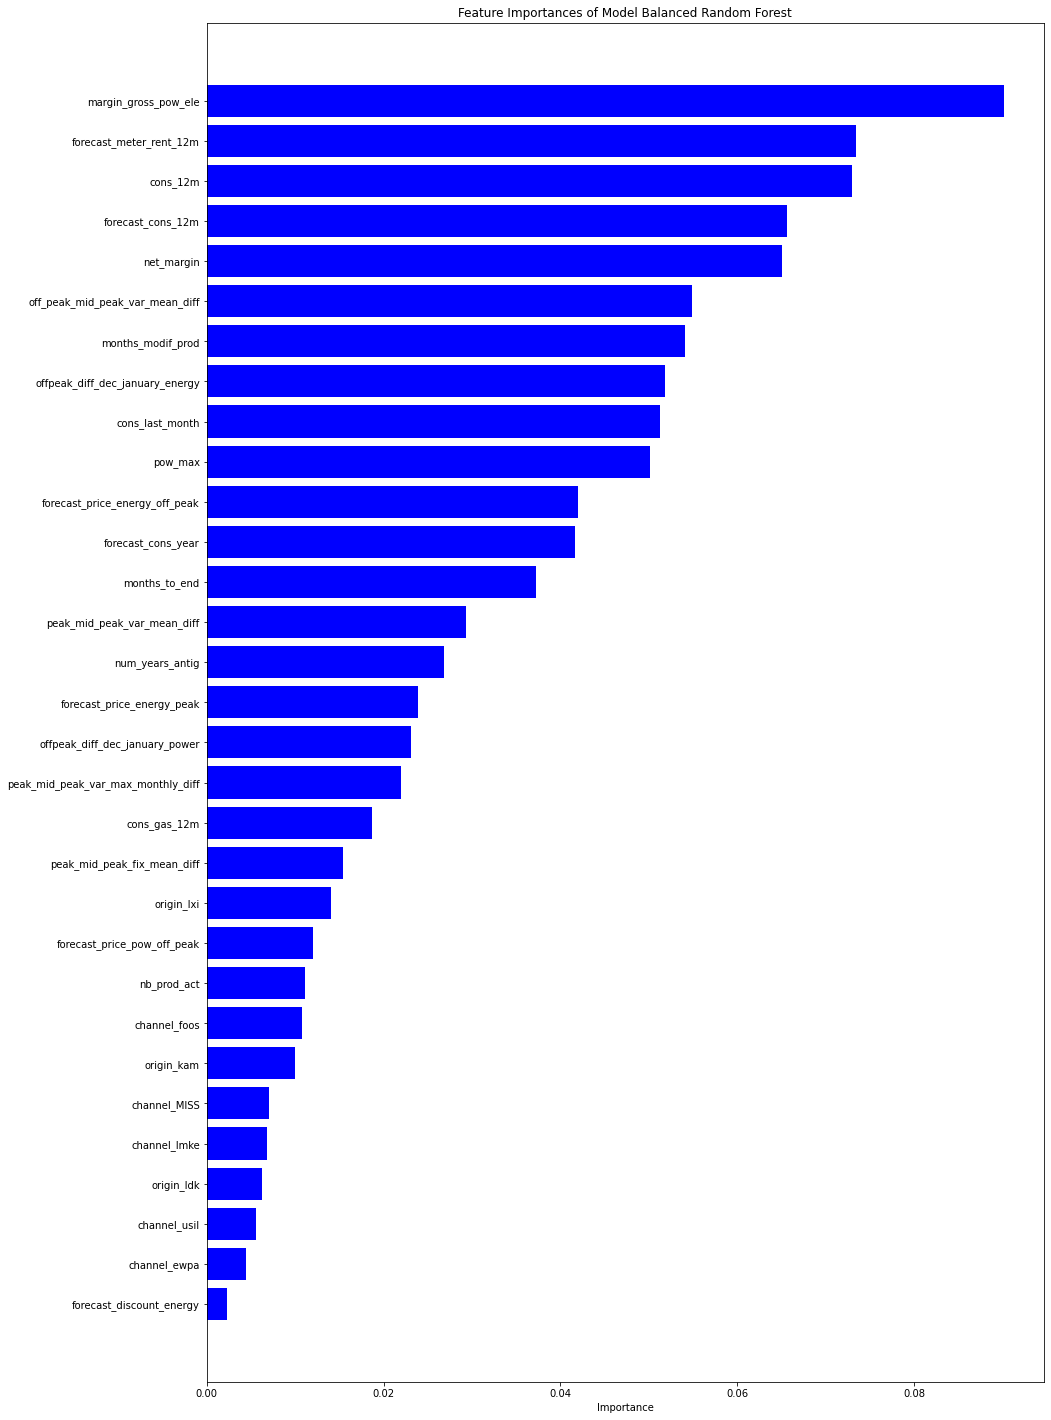

In [41]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances of Model Balanced Random Forest')
plt.barh(range(len(feature_importances_BRF)), feature_importances_BRF['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances_BRF)), feature_importances_BRF['features'])
plt.xlabel('Importance')
plt.show()

---
## 6. Conclusion & Future Work

In this imbalanced dataset, I have used 4 different model and grid search cross validation to find the best parameter to optimise its recall rate, an ensemble method,  Balanced Random Forest from imblearn has been the best model so far. 
In the Balanced Random Forest model, each tree of the forest is provided a balanced bootstrap sample.

From its feature importance, we can see the main features splitting the tree are net margin on power subscription,and consumption history.

Future work includes: 
1. Get more data from different aspects if possible, for example, customer reviews, complaints data, as those can also influence clients' churn.
2. Review the price history and analyse the root cause of its low predictive power, such as outlier data (lots of prices are 0). Deal with the outliers and re-add price sensitvity back into the prediction model.